In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pymongo import MongoClient
import copy
import math
from enum import Enum
import requests
import json
import pprint
from os import listdir

userRatingPath = "./data/"

class CollectibleType(Enum):
  All = 1
  Hands = 2
  Feet = 3
  Left = 4
  Right = 5
  LeftHand = 6
  RightHand = 7
  LeftFoot = 8
  RightFoot = 9

client = MongoClient('localhost', 27017)

db = client['beatfork']

versions = db.versions.find()

userRatings = {}
for fileName in listdir(userRatingPath):
  file = open(userRatingPath + fileName)
  userRating = json.load(file)
  id = userRating['_id']['levelId'] + '/' + userRating['_id']['versionId']
  if not id in userRating:
    userRatings[id] = {
      'overallDifficulty': [],
      'chunkDifficulties': []
    }
  userRatings[id]['overallDifficulty'].append(userRating['overallDifficulty'])
  userRatings[id]['chunkDifficulties'].append(userRating['chunkDifficulties'])
for version in userRatings:
  userRatings[version]['overallDifficulty'] = pd.DataFrame(userRatings[version]['overallDifficulty'])
  userRatings[version]['chunkDifficulties'] = pd.DataFrame(userRatings[version]['chunkDifficulties'])

sns.set_theme()
sns.set(rc={'figure.figsize': (10, 3)})

def calcDistanceXY(posA, posB):
  return ( (posA['x'] - posB['x']) ** 2 + (posA['y'] - posB['y']) ** 2 ) ** (1 / 2)

def calcDistanceZ(posA, posB):
  return abs(posA['z'] - posB['z'])

c:\Users\luis\python_environments\beatfork\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


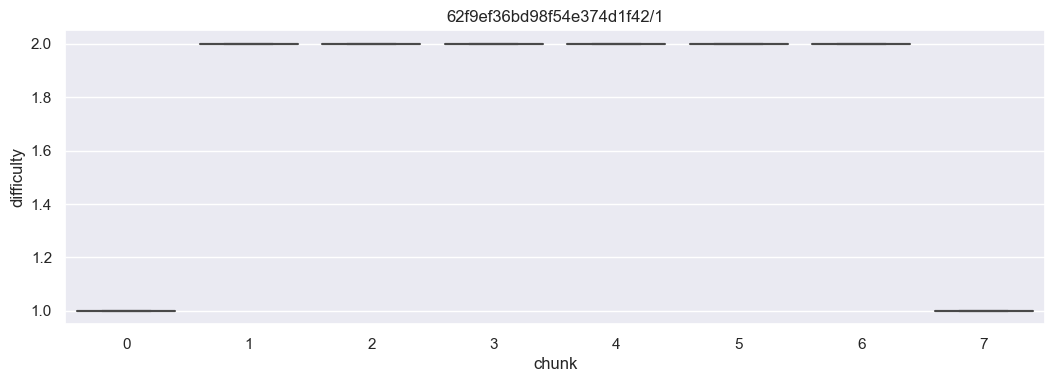

c:\Users\luis\python_environments\beatfork\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


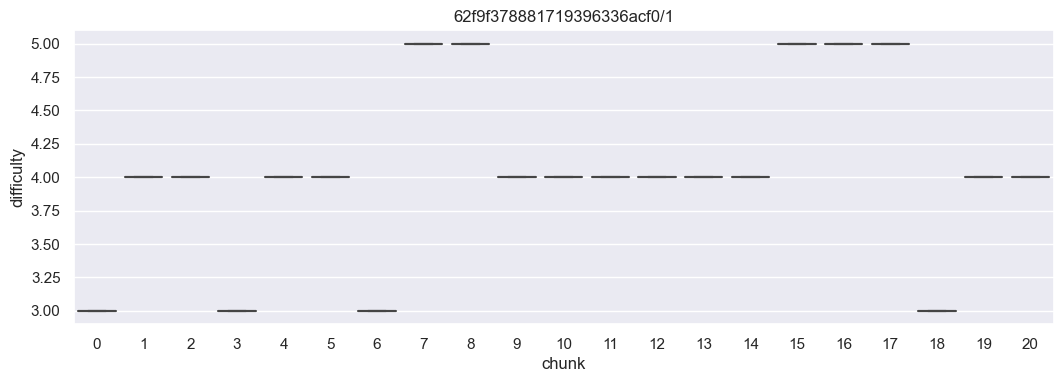

c:\Users\luis\python_environments\beatfork\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


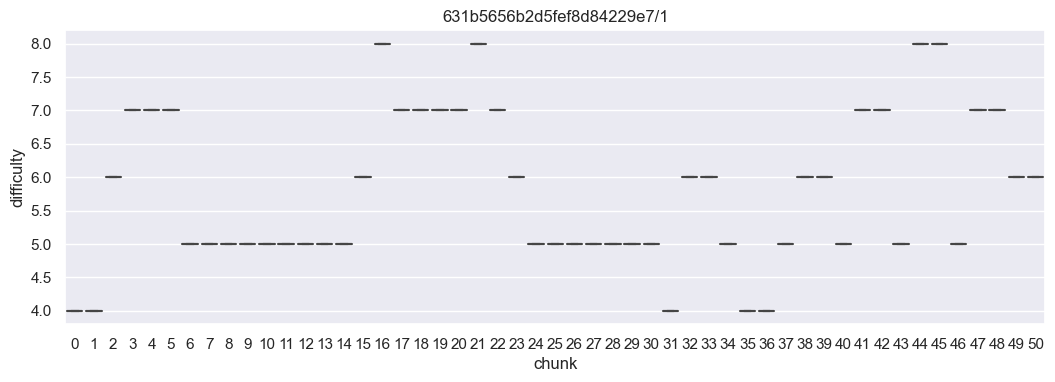

c:\Users\luis\python_environments\beatfork\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


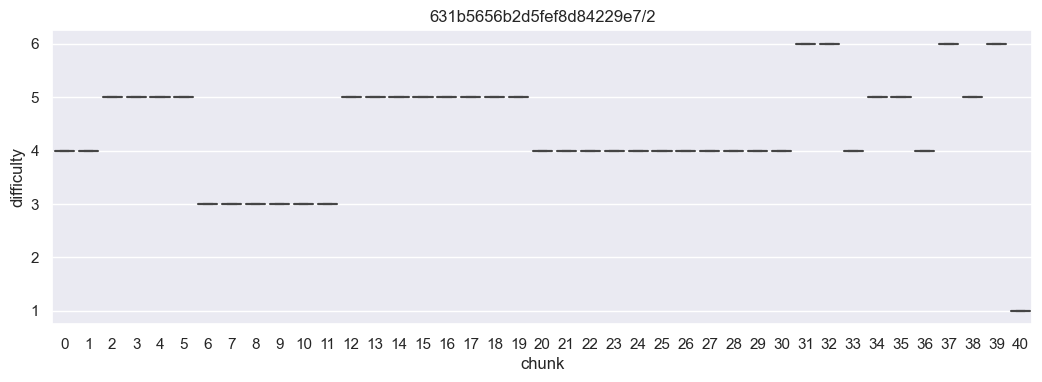

In [65]:
for version in userRatings:
  g = sns.boxplot(
    data=userRatings[version]['chunkDifficulties']
  )
  g.set_title(version)
  g.set_xlabel("chunk")
  g.set_ylabel("difficulty")
  plt.show()

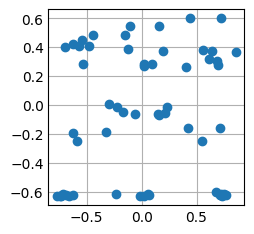

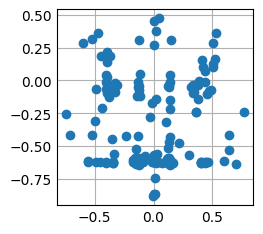

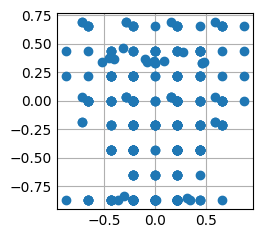

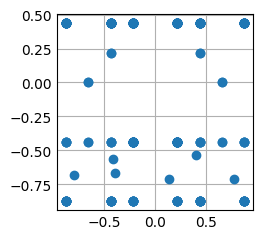

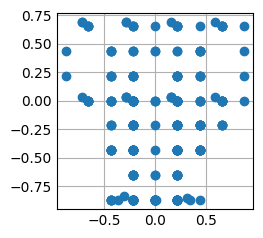

In [26]:
def plotXYOccurence(version):
  plt.style.use('_mpl-gallery')

  x = np.array(list(map(lambda obj:
    obj['position']['x']
  , version['objects'])))
  y = np.array(list(map(lambda obj:
    obj['position']['y']
  , version['objects'])))

  fig, ax = plt.subplots()

  ax.scatter(x, y, vmin=-1, vmax=1)

  plt.show()

for version in copy.deepcopy(versions):
  plotXYOccurence(version)

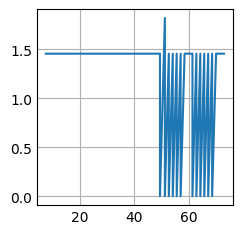

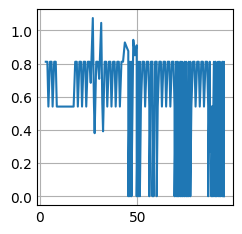

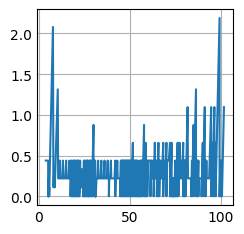

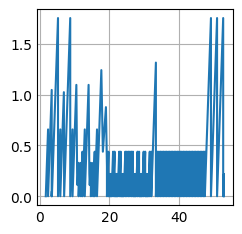

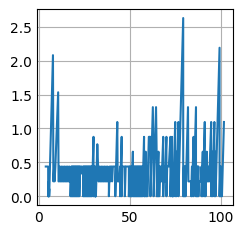

In [27]:
def plotZDistance(version):
  plt.style.use('_mpl-gallery')

  zDistanceBetweenBlocks = []
  lastZ = version['objects'].pop(0)['position']['z']
  for obj in version['objects']:
    zDistanceBetweenBlocks.append(obj['position']['z'] - lastZ)
    lastZ = obj['position']['z']

  x = np.array(list(map(lambda obj:
    obj['position']['z']
  , version['objects'])))
  y = np.array(zDistanceBetweenBlocks)

  fig, ax = plt.subplots()

  ax.plot(x, y)

  plt.show()

for version in copy.deepcopy(versions):
  plotZDistance(version)

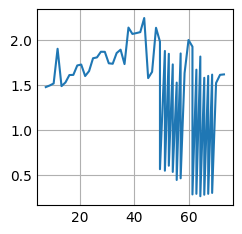

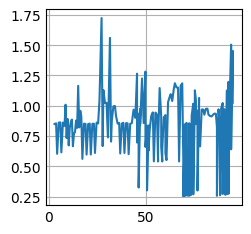

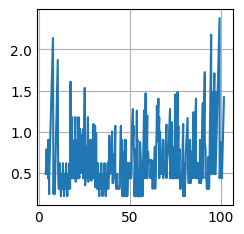

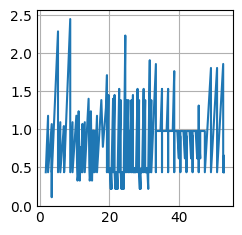

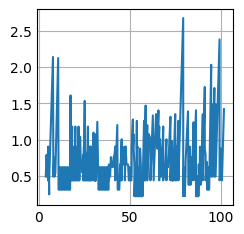

In [28]:
def plotDistance(version):
  plt.style.use('_mpl-gallery')

  distanceBetweenBlocks = []
  lastPosition = version['objects'].pop(0)['position']
  for obj in version['objects']:
    distanceBetweenBlocks.append((
      (obj['position']['x'] - lastPosition['x']) ** 2 +
      (obj['position']['y'] - lastPosition['y']) ** 2 +
      (obj['position']['z'] - lastPosition['z']) ** 2 ) ** 0.5)
    lastPosition = obj['position']

  x = np.array(list(map(lambda obj:
    obj['position']['z']
  , version['objects'])))
  y = np.array(distanceBetweenBlocks)

  fig, ax = plt.subplots()

  ax.plot(x, y)

  plt.show()

for version in copy.deepcopy(versions):
  plotDistance(version)

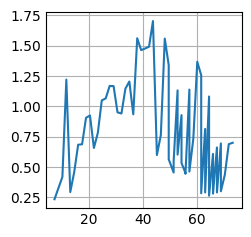

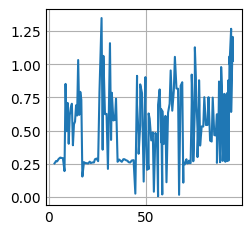

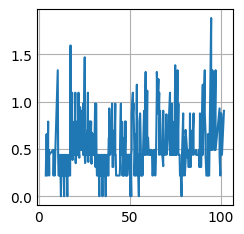

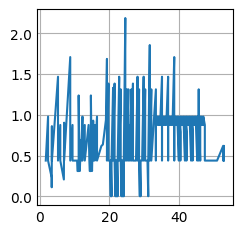

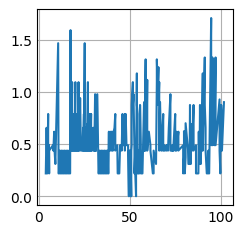

In [29]:
def plotXYDistance(version):
  plt.style.use('_mpl-gallery')

  distanceBetweenBlocks = []
  lastPosition = version['objects'].pop(0)['position']
  for obj in version['objects']:
    distanceBetweenBlocks.append((
      (obj['position']['x'] - lastPosition['x']) ** 2 +
      (obj['position']['y'] - lastPosition['y']) ** 2 ) ** 0.5)
    lastPosition = obj['position']

  x = np.array(list(map(lambda obj:
    obj['position']['z']
  , version['objects'])))
  y = np.array(distanceBetweenBlocks)

  fig, ax = plt.subplots()

  ax.plot(x, y)

  plt.show()

for version in copy.deepcopy(versions):
  plotXYDistance(version)

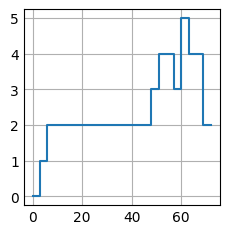

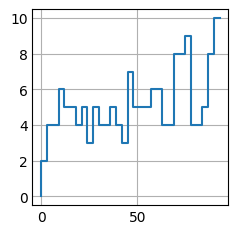

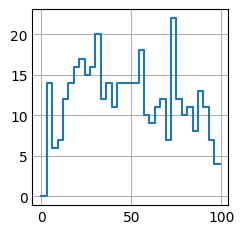

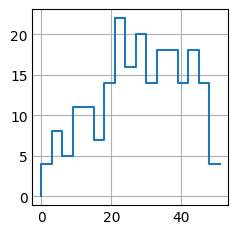

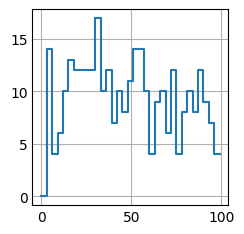

In [30]:
def plotDensity(version):
  secondsPerInterval = 3

  plt.style.use('_mpl-gallery')

  objects = version['objects']
  end = objects[-1]['position']['z']
  density = []
  for i in range(0, math.ceil(end / secondsPerInterval) * secondsPerInterval, secondsPerInterval):
    obstaclesInInterval = 0
    while len(objects) > 0 and objects[0]['position']['z'] < i:
      obstaclesInInterval += 1
      objects.pop(0)
    density.append(obstaclesInInterval)

  x = np.arange(0, math.ceil(end / secondsPerInterval) * secondsPerInterval, secondsPerInterval)
  y = np.array(density)

  fig, ax = plt.subplots()

  ax.step(x, y)

  plt.show()

for version in copy.deepcopy(versions):
  plotDensity(version)

In [31]:
def pickMinSquareRootScore(options):
  minOption = options.pop()
  minScore = (
      (minOption['cumulatedIntensity'][6] ** 2) +
      (minOption['cumulatedIntensity'][7] ** 2) +
      (minOption['cumulatedIntensity'][8] ** 2) +
      (minOption['cumulatedIntensity'][9] ** 2)
    ) ** 0.5
  squareRoots = list(map(lambda option:
    (
      (option['cumulatedIntensity'][6] ** 2) +
      (option['cumulatedIntensity'][7] ** 2) +
      (option['cumulatedIntensity'][8] ** 2) +
      (option['cumulatedIntensity'][9] ** 2)
    ) ** 0.5
  , options))
  for i in range(0, len(options)):
    if squareRoots[i] < minScore:
      minScore = squareRoots[i]
      minOption = options[i]
  return minOption

def getMinIntensity(objects, cumulatedIntensity, lastPositions, calcIntensity):
  if len(objects) == 0:
    return {
      'cumulatedIntensity': cumulatedIntensity,
      'lastPositions': lastPositions,
    }
  obj = objects.pop(0)
  if obj[3] != 0:
    match obj[3]:
      case 1:
        obj[3] = 6
        a = getMinIntensity([obj, *objects], copy.deepcopy(cumulatedIntensity), copy.deepcopy(lastPositions), calcIntensity)
        obj[3] = 7
        b = getMinIntensity([obj, *objects], copy.deepcopy(cumulatedIntensity), copy.deepcopy(lastPositions), calcIntensity)
        obj[3] = 8
        c = getMinIntensity([obj, *objects], copy.deepcopy(cumulatedIntensity), copy.deepcopy(lastPositions), calcIntensity)
        obj[3] = 9
        d = getMinIntensity([obj, *objects], copy.deepcopy(cumulatedIntensity), copy.deepcopy(lastPositions), calcIntensity)
        return pickMinSquareRootScore([a, b, c, d])
      case 2:
        obj[3] = 6
        a = getMinIntensity([obj, *objects], copy.deepcopy(cumulatedIntensity), copy.deepcopy(lastPositions), calcIntensity)
        obj[3] = 7
        b = getMinIntensity([obj, *objects], copy.deepcopy(cumulatedIntensity), copy.deepcopy(lastPositions), calcIntensity)
        return pickMinSquareRootScore([a, b])
      case 3:
        obj[3] = 8
        a = getMinIntensity([obj, *objects], copy.deepcopy(cumulatedIntensity), copy.deepcopy(lastPositions), calcIntensity)
        obj[3] = 9
        b = getMinIntensity([obj, *objects], copy.deepcopy(cumulatedIntensity), copy.deepcopy(lastPositions), calcIntensity)
        return pickMinSquareRootScore([a, b])
      case 4:
        obj[3] = 6
        a = getMinIntensity([obj, *objects], copy.deepcopy(cumulatedIntensity), copy.deepcopy(lastPositions), calcIntensity)
        obj[3] = 8
        b = getMinIntensity([obj, *objects], copy.deepcopy(cumulatedIntensity), copy.deepcopy(lastPositions), calcIntensity)
        return pickMinSquareRootScore([a, b])
      case 5:
        obj[3] = 7
        a = getMinIntensity([obj, *objects], copy.deepcopy(cumulatedIntensity), copy.deepcopy(lastPositions), calcIntensity)
        obj[3] = 9
        b = getMinIntensity([obj, *objects], copy.deepcopy(cumulatedIntensity), copy.deepcopy(lastPositions), calcIntensity)
        return pickMinSquareRootScore([a, b])
      case 6 | 7 | 8 | 9:
        intensity = calcIntensity(obj, lastPositions)
        cumulatedIntensity[obj[3]] += intensity
        lastPositions[obj[3]] = [obj[0], obj[1], obj[2]]
        return getMinIntensity(copy.deepcopy(objects), copy.deepcopy(cumulatedIntensity), copy.deepcopy(lastPositions), calcIntensity)
  else: # obstacle
    # todo
    return getMinIntensity(copy.deepcopy(objects), copy.deepcopy(cumulatedIntensity), copy.deepcopy(lastPositions), calcIntensity)

# %reload_ext line_profiler
# objects = [
#     [0.4041569099545159, 0.26385379945425225, 5.818181818181818, 1],
#     [0.19668416357129426, 0.37005910237923434, 7.272727272727273, 1],
#     [-0.1286331027576143, 0.38499422310305553, 8.727272727272727, 1],
#     [-0.5402590315819069, 0.44971307957296947, 10.181818181818182, 1],
#     [0.05560269603070369, -0.6139994075350503, 11.636363636363637, 1],
#     [-0.2365189308768725, -0.6123399496768461, 13.090909090909092, 1],
#     [-0.6929589729199602, -0.6222966968260651, 14.545454545454545, 1],
#     [-0.01078858281192716, -0.6272750704006718, 16, 1]
# ]
# cumulatedIntensity = {
#   CollectibleType.LeftHand.value: 0,
#   CollectibleType.RightHand.value: 0,
#   CollectibleType.LeftFoot.value: 0,
#   CollectibleType.RightFoot.value: 0
# }
# startPositions = {
#   CollectibleType.LeftHand.value: [-0.3, 0, 0],
#   CollectibleType.RightHand.value: [0.3, 0, 0],
#   CollectibleType.LeftFoot.value: [-0.2, -1, 0],
#   CollectibleType.RightFoot.value: [0.2, -1, 0]
# }   
# %lprun -f getMinIntensity getMinIntensity(objects, cumulatedIntensity, startPositions)

In [32]:
# Sampling (like in signal processing)
# 
# Sampled naive algorithm is still very slow even with low chunk sizes as 8 it takes about 10s to run per level version.
# Converting to JS failed, because JS cannot deal with soo many recursions without further steps.
# Maybe rewrite iteratively. Does that solve the problem though?
# Definitely need more performance for larger chunk sizes.

chunkSize = 8
overlap = 0
url = 'http://localhost:4000/json-rpc'
headers = { 'Content-Type': 'application/json' }

def plotBestOptions(options, chunkSize):

  def removeInf(option):
    for limb in option['cumulatedIntensity'].values():
      if limb == math.inf:
        option['cumulatedIntensity'] = {
          6: 0,
          7: 0,
          8: 0,
          9: 0,
        }
        return option
    return option

  options = list(map(removeInf, options))

  chunkLabels = list(range(0, len(options)))
  leftHandIntensity = np.array(list(map(lambda option:
    option['cumulatedIntensity'][CollectibleType.LeftHand.value]
    , options)))
  rightHandIntensity = np.array(list(map(lambda option:
    option['cumulatedIntensity'][CollectibleType.RightHand.value]
    , options)))
  leftFootIntensity = np.array(list(map(lambda option:
    option['cumulatedIntensity'][CollectibleType.LeftFoot.value]
    , options)))
  rightFootIntensity = np.array(list(map(lambda option:
    option['cumulatedIntensity'][CollectibleType.RightFoot.value]
    , options)))
  fig, ax = plt.subplots()
  ax.bar(chunkLabels, leftHandIntensity, label='Left Hand')
  ax.bar(chunkLabels, rightHandIntensity, label='Right Hand')
  ax.bar(chunkLabels, leftFootIntensity, label='Left Foot')
  ax.bar(chunkLabels, rightFootIntensity, label='Right Foot')
  ax.set_xlabel('Chunk')
  ax.set_ylabel('Intensity')
  ax.set_title('Intensity Samples')
  ax.legend()
  plt.ylim([0, 10]) # todo
  plt.show()


def split(myList, chunkSize, overlap):
  for i in range (0, len(myList), chunkSize):
    yield myList[i: i + chunkSize + overlap]

def plotSampledGetMinIntensity(calcIntensity):
  for version in copy.deepcopy(versions):
    chunks = list(split(version['objects'], chunkSize, overlap))
    startPositions = {
      CollectibleType.LeftHand.value: [-0.3, 0, 0],
      CollectibleType.RightHand.value: [0.3, 0, 0],
      CollectibleType.LeftFoot.value: [-0.2, -1, 0],
      CollectibleType.RightFoot.value: [0.2, -1, 0]
    }
    bestOptions = []
    for chunk in chunks:
      bestOptions.append(getMinIntensity(
        list(map(lambda obj:
          [
            obj['position']['x'],
            obj['position']['y'],
            obj['position']['z'],
            obj['collectibleType'] if obj['type'] == "Collectible" else 0
          ]
        , chunk)),
        {
          CollectibleType.LeftHand.value: 0,
          CollectibleType.RightHand.value: 0,
          CollectibleType.LeftFoot.value: 0,
          CollectibleType.RightFoot.value: 0,
        },
        startPositions,
        calcIntensity
      ))
      startPositions = bestOptions[-1]['lastPositions']
    plotBestOptions(bestOptions, chunkSize)

#%reload_ext line_profiler
#%lprun -f plotSampledGetMinIntensity plotSampledGetMinIntensity()

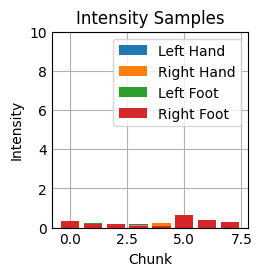

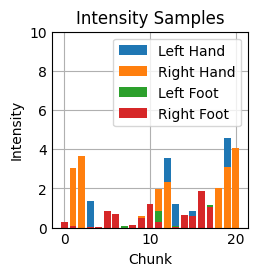

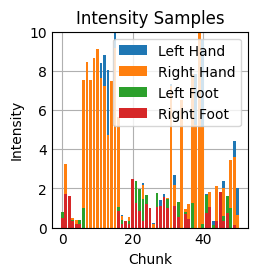

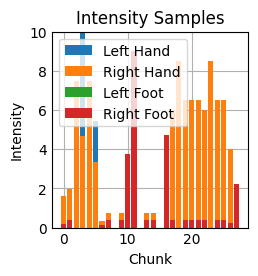

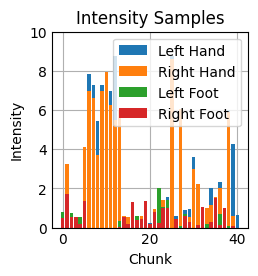

In [33]:
def simpleIntensity(obj, lastPositions):
  distance = ((lastPositions[obj[3]][0] - obj[0]) ** 2 + (lastPositions[obj[3]][1] - obj[1]) ** 2) ** 0.5
  time = abs(lastPositions[obj[3]][2] - obj[2])
  if (distance == 0):
    return 0
  if (time == 0):
    return math.inf
  return distance / time

plotSampledGetMinIntensity(simpleIntensity)

In [34]:
def rightLegAmputeeIntensity(obj, lastPositions):
  if (obj[3] == 9):
    return math.inf
  distance = ((lastPositions[obj[3]][0] - obj[0]) ** 2 + (lastPositions[obj[3]][1] - obj[1]) ** 2) ** 0.5
  time = abs(lastPositions[obj[3]][2] - obj[2])
  if (distance == 0):
    return 0
  if (time == 0):
    return math.inf
  return distance / time

# plotSampledGetMinIntensity(rightLegAmputeeIntensity)

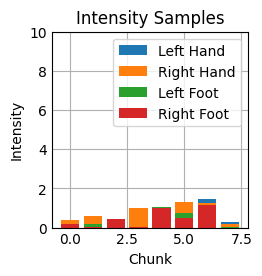

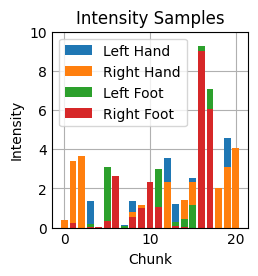

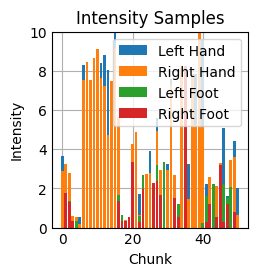

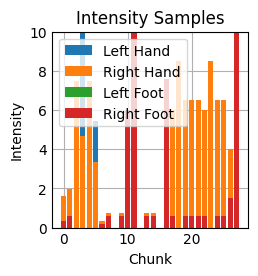

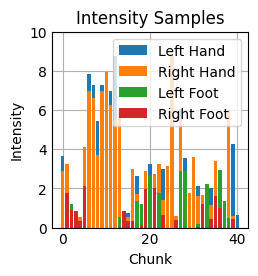

In [35]:
velocity = {
  6: 0,
  7: 0,
  8: 0,
  9: 0
}

def intensity(obj, lastPositions):
  distance = ((lastPositions[obj[3]][0] - obj[0]) ** 2 + (lastPositions[obj[3]][1] - obj[1]) ** 2) ** 0.5
  time = abs(lastPositions[obj[3]][2] - obj[2])

  # General edge cases
  if (distance == 0):
    return 0
  if (time == 0):
    return math.inf

  # Hands
  if (obj[3] == 6 or obj[3] == 7):
    return distance / time
  # Feet
  elif (obj[3] == 8 or obj[3] == 9):
    return distance / time * (2 + obj[1]) ** 4
  return math.inf

plotSampledGetMinIntensity(intensity)